<a href="https://colab.research.google.com/github/WilkisterMbaka/MTN-Cote-dIvoire-Data-Analysis/blob/main/Moringa_Data_Science_Prep_W3_Independent_Project_2022_04_Wilkister_Mbaka_PythonPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MTN COTE D'IVOIRE DATA SCIENCE PROJECT
With sample data provided by MTN Cote d’Ivoire,  we are looking for business insights into how best MTN Cote d’Ivoire can go about upgrading its infrastructure in a bid to get more users and hence more profit.

**DATA PROVIDED**

cells_geo_description.xlsx : https://drive.google.com/file/d/1-rIM5ihDu79RaH7rAs-d-7SQSAQhrY9N/view

cells_geo.csv : https://drive.google.com/file/d/1ABZux280OjL3yWcOn8BDA_f5QsyO0QPU/view

CDR_description.xlsx : https://drive.google.com/file/d/1cVoNXl25IO5-_yQk97ThdeqhE6yw8YTD/view

CDR 20120507 [https://bit.ly/Telcom_dataset1]

CDR 20120508 [https://bit.ly/Telcom_dataset2]

CDR 20120509 [https://bit.ly/Telcom_dataset3]

**METHODOLOGY: CRISP DM**
* Data Loading
* Data Understanding
* Data Preparation
* Data Analysis
* Recommendation
* Evaluation


# Data Loading

In [1]:
# import pandas

import pandas as pd

# import numpy

import numpy as np

In [2]:
# load cells_geo_description
# Site (there are several cells per site, several sites per City, several Cities per Zone, etc.)

url='https://drive.google.com/file/d/1-rIM5ihDu79RaH7rAs-d-7SQSAQhrY9N/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
cells_geo_description = pd.read_excel(url)

cells_geo_description

,Column name,Description,Format
0,VILLES,City,String
1,STATUS,In Service or not,String
2,LOCALISATION,in ABIDJAN or not,String
3,DECOUPZONE,Geographical Zone,String
4,ZONENAME,Name of Zone,String
5,LONGITUDE,Longitude,Float
6,LATITUDE,Latitude,Float
7,REGION,Region,String
8,AREA,Area,String
9,CELL_ID,ID of the cell,String


In [3]:
# load cells_geo

cells_geo = pd.read_csv('/content/cells_geo.csv',delimiter=';', header =1, names = ['INDEX','VILLES','STATUS','LOCALISATION','DECOUPZONE','ZONENAME','LONGITUDE','LATITUDE','REGION','AREA','CELL_ID','SITE_ID'])

cells_geo


,INDEX,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_ID
0,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
1,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
2,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
3,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
4,5,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,0b4f56438f,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...,...
3968,3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3969,3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3970,3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3971,3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [4]:
# load CDR_description

url='https://drive.google.com/file/d/1cVoNXl25IO5-_yQk97ThdeqhE6yw8YTD/view'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
CDR_description = pd.read_excel(url)

CDR_description

,Column name,Description,Format
0,PRODUCT,Voice or SMS,String
1,VALUE,Billing price,Integer
2,DATE_TIME,Time in format yyyy-MM-dd hh:mm:ss.0,String
3,CELL_ON_SITE,Which cell in the site was used (not needed here),Integer
4,DW_A_NUMBER_INT,Anonymized phone number of the person for whic...,String
5,DW_B_NUMBER_INT,Anonymized phone number of the counterparty,String
6,COUNTRY_A,Country of party A (useless here),String
7,COUNTRY_B,Country of party B (useless here),String
8,CELL_ID,ID of the cell,String
9,SITE_ID,ID of the SITE,String


In [5]:
# load Telcom_dataset 

t_df = pd.read_csv('/content/Telcom_dataset.csv')

# rename columns to be uniform

t_df = t_df.rename(columns = {'PRODUTC':'PRODUCT','DW_A_NUMBER_INT':'DW_A_NUMBER','DW_B_NUMBER_INT':'DW_B_NUMBER','DATETIME':'DATE_TIME'})

t_df

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...,...,...
4996,sms,100,2012-05-07 00:01:54.0,0,92e367d671f45c5,38811081cf82c90,19e2e,OTHER,0c2371d9bc,1e751d08a4
4997,Voice,1,2012-05-07 00:01:54.0,1,83b44b18238e602,6ec63d4aa5de5dd,19e2e,19e2e,5fb791cf56,65efe2bc62
4998,Voice,0,2012-05-07 00:01:54.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,7773627c12,9ef9616350
4999,Voice,0,2012-05-07 00:01:54.0,0,a1613f1a992716a,bd663f07b6c8bcd,19e2e,19e2e,3f4af49d6c,969b8d0e39


In [6]:
# load Telcom_dataset2

t_df2 = pd.read_csv('/content/Telcom_dataset2.csv')

t_df2

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,sms,0,2012-05-07 23:02:06.0,2,32255675c3b6fe3,1aa7ae01386e9fb,19e2e,19e2e,+854AcBQT2,+854AcBQT2
1,Voice,0,2012-05-07 23:03:44.0,1,ff16d6ac74c1c64,87d87309c15a8c9,19e2e,19e2e,+854AcBQT2,+854AcBQT2
2,sms,0,2012-05-07 23:04:06.0,0,98d9f2fb5ff624b,93343ba6e41af95,19e2e,19e2e,+laSrk7g6q,+laSrk7g6q
3,Voice,37,2012-05-07 23:04:48.0,1,3f9c8a33ec7be1f,7d05a38f89c49d8,19e2e,19e2e,/xvRrCVKoQ,/xvRrCVKoQ
4,sms,25,2012-05-07 23:04:58.0,1,7bcccc03adf3864,56a5d5430d2fa86,19e2e,19e2e,+bO+qkSonO,+bO+qkSonO
...,...,...,...,...,...,...,...,...,...,...
4996,sms,0,2012-05-08 00:01:53.0,8,22ffbbb8ac8cde1,8db839a0c08bd54,19e2e,19e2e,896459aace,b7d00e59e4
4997,sms,25,2012-05-08 00:01:53.0,0,bcf512a3542d42c,5a2848d6f983c31,19e2e,19e2e,7e90b35166,211015b14d
4998,sms,0,2012-05-08 00:01:53.0,0,05e3c3d41628a9f,7185a95077eae9e,19e2e,19e2e,fe70e431df,c7ea989264
4999,data,0,2012-05-08 00:01:53.0,_,86a4dbf018f6f24,5a4dc9e82deb309,19e2e,OTHER,ffa6759bb2,NaN


In [7]:
# load Telcom_dataset3

t_df3 = pd.read_csv('/content/Telcom_dataset3.csv')

# rename columns to be uniform

t_df3 = t_df3.rename(columns = {'DW_A_NUMBER_INT':'DW_A_NUMBER','DW_B_NUMBER_INT':'DW_B_NUMBER','CELLID':'CELL_ID','SIET_ID':'SITE_ID'})

t_df3

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID
0,Voice,61,2012-05-08 23:01:28.0,2,966f68353622feb,ffd53a3bb2db6f1,19e2e,19e2e,+38u2u/rfx,+38u2u/rfx
1,sms,0,2012-05-08 23:01:31.0,1,a0a597384c612d7,cf3b218f1dde792,19e2e,19e2e,+Fs4mTvdKx,+Fs4mTvdKx
2,Voice,10,2012-05-08 23:02:59.0,1,5441a9a58c97132,52f8b299515b9b7,19e2e,19e2e,+ZaaZozy/+,+ZaaZozy/+
3,sms,0,2012-05-08 23:03:04.0,0,8ab8b9ed6989f61,e09e736e46c5c3d,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3
4,Voice,22,2012-05-08 23:03:16.0,4,52662a62b199334,2186273faab4602,19e2e,19e2e,/eeMklgyJA,/eeMklgyJA
...,...,...,...,...,...,...,...,...,...,...
4996,Voice,0,2012-05-09 00:01:43.0,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43.0,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,7f1f2f889f,b4ddb9e93c
4998,Voice,32,2012-05-09 00:01:43.0,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,a4731e780e,d68260ef50
4999,Voice,30,2012-05-09 00:01:43.0,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,98ed726da2,b4130b54ab


# Data Understanding

In [8]:
# data information from cells_geo

#check for missing values
print(cells_geo.isnull().sum())
print('')

cells_geo.info()
print('')

cells_geo.describe()

INDEX            0
VILLES           0
STATUS          67
LOCALISATION     0
DECOUPZONE       0
ZONENAME         6
LONGITUDE        0
LATITUDE         0
REGION           0
AREA            22
CELL_ID          0
SITE_ID          0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3973 entries, 0 to 3972
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INDEX         3973 non-null   int64  
 1   VILLES        3973 non-null   object 
 2   STATUS        3906 non-null   object 
 3   LOCALISATION  3973 non-null   object 
 4   DECOUPZONE    3973 non-null   object 
 5   ZONENAME      3967 non-null   object 
 6   LONGITUDE     3973 non-null   float64
 7   LATITUDE      3973 non-null   float64
 8   REGION        3973 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3973 non-null   object 
 11  SITE_ID       3973 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory us

,INDEX,LONGITUDE,LATITUDE
count,3973.000000,3973.000000,3973.000000
mean,1987.000000,-4.877880,6.244970
std,1147.050638,1.300861,1.304289
min,1.000000,-8.503889,0.000000
25%,994.000000,-5.846139,5.338639
50%,1987.000000,-4.084500,5.475000
75%,2980.000000,-3.993444,6.872306
max,3973.000000,-0.000000,10.481861


In [9]:
# data information from Telcom_dataset

#check for missing data
print(t_df.isnull().sum())
print('')

t_df.info()
print('')

t_df.describe()

PRODUCT           0
VALUE             0
DATE_TIME         0
CELL_ON_SITE      0
DW_A_NUMBER       0
DW_B_NUMBER       0
COUNTRY_A         0
COUNTRY_B         0
CELL_ID           0
SITE_ID         716
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT       5001 non-null   object
 1   VALUE         5001 non-null   int64 
 2   DATE_TIME     5001 non-null   object
 3   CELL_ON_SITE  5001 non-null   object
 4   DW_A_NUMBER   5001 non-null   object
 5   DW_B_NUMBER   5001 non-null   object
 6   COUNTRY_A     5001 non-null   object
 7   COUNTRY_B     5001 non-null   object
 8   CELL_ID       5001 non-null   object
 9   SITE_ID       4285 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB



,VALUE
count,5001.000000
mean,25.869626
std,101.934502
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,4440.000000


In [10]:
# data information from Telcom_dataset2

#check for missing data
print(t_df2.isnull().sum())
print('')

t_df2.info()
print('')

t_df2.describe()

PRODUCT           0
VALUE             0
DATE_TIME         0
CELL_ON_SITE      0
DW_A_NUMBER       0
DW_B_NUMBER       0
COUNTRY_A         0
COUNTRY_B         0
CELL_ID           0
SITE_ID         676
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT       5001 non-null   object
 1   VALUE         5001 non-null   int64 
 2   DATE_TIME     5001 non-null   object
 3   CELL_ON_SITE  5001 non-null   object
 4   DW_A_NUMBER   5001 non-null   object
 5   DW_B_NUMBER   5001 non-null   object
 6   COUNTRY_A     5001 non-null   object
 7   COUNTRY_B     5001 non-null   object
 8   CELL_ID       5001 non-null   object
 9   SITE_ID       4325 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB



,VALUE
count,5001.000000
mean,24.334933
std,97.471586
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,3380.000000


In [11]:
# data information from Telcom_dataset3

#check for missing data
print(t_df3.isnull().sum())
print('')

t_df3.info()
print('')

t_df3.describe()

PRODUCT           0
VALUE             0
DATE_TIME         0
CELL_ON_SITE      0
DW_A_NUMBER       0
DW_B_NUMBER       0
COUNTRY_A         0
COUNTRY_B         0
CELL_ID           0
SITE_ID         605
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT       5001 non-null   object
 1   VALUE         5001 non-null   int64 
 2   DATE_TIME     5001 non-null   object
 3   CELL_ON_SITE  5001 non-null   object
 4   DW_A_NUMBER   5001 non-null   object
 5   DW_B_NUMBER   5001 non-null   object
 6   COUNTRY_A     5001 non-null   object
 7   COUNTRY_B     5001 non-null   object
 8   CELL_ID       5001 non-null   object
 9   SITE_ID       4396 non-null   object
dtypes: int64(1), object(9)
memory usage: 390.8+ KB



,VALUE
count,5001.000000
mean,26.441512
std,224.200217
min,0.000000
25%,0.000000
50%,0.000000
75%,25.000000
max,12900.000000


# Data Preparation

In [12]:
# concatenate the 3 telekom data sets to make 1 dataset
t_df_combo = pd.concat([t_df,t_df2,t_df3], axis = 0)
t_df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15003 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT       15003 non-null  object
 1   VALUE         15003 non-null  int64 
 2   DATE_TIME     15003 non-null  object
 3   CELL_ON_SITE  15003 non-null  object
 4   DW_A_NUMBER   15003 non-null  object
 5   DW_B_NUMBER   15003 non-null  object
 6   COUNTRY_A     15003 non-null  object
 7   COUNTRY_B     15003 non-null  object
 8   CELL_ID       15003 non-null  object
 9   SITE_ID       13006 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


In [13]:
# change DATE_TIME datatype from object to datetime datatype

t_df_combo['DATE_TIME'] = pd.to_datetime(t_df_combo['DATE_TIME'])
t_df_combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15003 entries, 0 to 5000
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PRODUCT       15003 non-null  object        
 1   VALUE         15003 non-null  int64         
 2   DATE_TIME     15003 non-null  datetime64[ns]
 3   CELL_ON_SITE  15003 non-null  object        
 4   DW_A_NUMBER   15003 non-null  object        
 5   DW_B_NUMBER   15003 non-null  object        
 6   COUNTRY_A     15003 non-null  object        
 7   COUNTRY_B     15003 non-null  object        
 8   CELL_ID       15003 non-null  object        
 9   SITE_ID       13006 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.3+ MB


In [14]:
# Drop columns that are not required from t_df_combo

t_df_combo = t_df_combo.drop(['COUNTRY_A','COUNTRY_B'], axis = 1)
t_df_combo.head()

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37,1,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25,0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41,0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42,1,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29,1,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv


In [15]:
# Drop duplicates

t_df_combo = t_df_combo.drop_duplicates()
t_df_combo

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,CELL_ID,SITE_ID
0,Voice,0,2012-05-06 23:04:37,1,49fae048b547780,1a49f8b0ded9de6,/TJNe+Mmtu,/TJNe+Mmtu
1,sms,0,2012-05-06 23:05:25,0,7a54a6eaee19e65,93343ba6e41af95,/+cKZKIp41,/+cKZKIp41
2,sms,25,2012-05-06 23:05:41,0,6008887b0207d82,7aacc9709ce0a20,/u0FSD+ahi,/u0FSD+ahi
3,Voice,56,2012-05-06 23:05:42,1,7370032e20f4e96,6af4a60e74c91d3,+cNeJzsTp3,+cNeJzsTp3
4,Voice,14,2012-05-06 23:06:29,1,966ba4656e38e62,02aa736ee555d5c,051KhYDCpv,051KhYDCpv
...,...,...,...,...,...,...,...,...
4995,Voice,10,2012-05-09 00:01:43,0,2f834987f0c1825,accc8e5c1164343,6467daa1db,8a96bae9c1
4996,Voice,0,2012-05-09 00:01:43,3,467333ade2b4b9c,0ab2acd804d01fe,2aa04dcab7,f7d63a29e5
4997,Voice,62,2012-05-09 00:01:43,1,e077a6b74c5053c,4c8098eb6ea1a41,7f1f2f889f,b4ddb9e93c
4999,Voice,30,2012-05-09 00:01:43,2,672ce74c418aa7a,f9ff5af59cf0d68,98ed726da2,b4130b54ab


In [16]:
#fill missing values on site id column with None
t_df_combo["SITE_ID"] = t_df_combo['SITE_ID'].fillna('None')

In [17]:
# check for change in data

print(t_df_combo['SITE_ID'].value_counts())
print('')

None          1961
7f76d66503     110
b47a998a3e      98
a7bd4c027b      79
5c565fbfb1      75
              ... 
HDTX65E7ic       1
PYgURTUHcG       1
QopBUmndlf       1
PohuYomFPJ       1
ab91f5b21d       1
Name: SITE_ID, Length: 1358, dtype: int64



In [18]:
# Drop columns that are not required cells_geo (makes site id be repeated)

cells_geo1 = cells_geo.drop(['INDEX','CELL_ID'], axis = 1)
cells_geo1

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,SITE_ID
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0bb492ef17
2,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,8a1e6ce31f
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...
3968,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,f91ed8d2e9
3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,f91ed8d2e9
3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,61bee9c70c
3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,61bee9c70c


In [19]:
# Drop duplicates for cells_geo1

cells_geo1 = cells_geo1.drop_duplicates()
cells_geo1

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,SITE_ID
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0bb492ef17
2,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,8a1e6ce31f
5,KRIKOREA,In Service,INTERIEUR,Grand-OUEST,"KRIKOREA""",-6.627056,6.707361,HAUT SASSANDRA,NaN,260dbfedc5
6,ABOBO,In Service,ABIDJAN,"""Abidjan_NORD",NPONON,-4.023583,5.435694,LAGUNE,NaN,56306cc7ca
8,ABOBO,NaN,ABIDJAN,"""Abidjan_NORD",NPONON,-4.023583,5.435694,LAGUNE,NaN,56306cc7ca
...,...,...,...,...,...,...,...,...,...,...
3959,ZON-HOUNIEN,In Service,INTERIEUR,Grand-OUEST,ZONE D - Grand-OUEST,-8.205167,6.920500,18 MONTAGNES,NORTH WEST,32b8357a82
3962,ZOUKOUGBEU,In Service,INTERIEUR,Grand-OUEST,ZONE D - Grand-OUEST,-6.865694,6.761306,HAUT SASSANDRA,NORTH WEST,443ac3fc19
3965,MARCORY,In Service,ABIDJAN,Abidjan_CENTRE,ZONE A - Abidjan_CENTRE,-4.017944,5.265194,LAGUNE,ABIDJAN SOUTH,6daf54117b
3967,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,f91ed8d2e9


In [20]:
# Fill in the missing values

cells_geo1['STATUS'] = cells_geo1['STATUS'].fillna('not in service')

cells_geo1['ZONENAME'] = cells_geo1['ZONENAME'].fillna('None')

cells_geo1['AREA'] = cells_geo1['AREA'].fillna('None')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [21]:
# merge t_df_combo and cell_geo with SITE_ID as the column to merge with

data = pd.merge(t_df_combo,cells_geo1, how = 'inner',on = 'SITE_ID')
data

,PRODUCT,VALUE,DATE_TIME,CELL_ON_SITE,DW_A_NUMBER,DW_B_NUMBER,CELL_ID,SITE_ID,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA
0,sms,0,2012-05-07 00:00:00,1,8118c3aa53d6c7b,1d103ea638ad1f0,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH
1,Voice,92,2012-05-07 00:00:06,4,ada82842ff7cf09,d35102ff14c13b2,1e798cb0dc,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH
2,sms,25,2012-05-07 00:00:21,0,74189e127808747,3704381e2e76259,e3ef47df3f,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH
3,Voice,16,2012-05-07 00:00:21,0,2313f147b4452d5,4e4bb5a13d08fb9,e3ef47df3f,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH
4,Voice,35,2012-05-07 00:00:41,1,f7c3a56c793594a,b738d6d953faa78,5d9dc897f7,1b5540c02d,BOUAKE,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.027139,7.718417,VALLEE DU BANDAMA,CENTRE NORTH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10734,Voice,0,2012-05-09 00:01:27,2,0f9c90a6ee44083,1a49f8b0ded9de6,f9640a19ed,8cc89f3fa9,PAKAOUBO,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-5.786194,7.170250,MARAHOUE,CENTRE NORTH
10735,sms,0,2012-05-09 00:01:42,1,dd953c2ab18c1b7,4b30ffe72e8a405,9407858a4c,d236ec6ca8,TIAPOUM,In Service,INTERIEUR,Grand-EST,ZONE C - Grand-EST,-3.020500,5.138750,SUD COMOE,ABIDJAN SOUTH
10736,Voice,47,2012-05-09 00:01:42,1,144d260d1961913,fc15d238a9d904f,99b81a5dd0,aa59cc7ced,BLANFLA,In Service,INTERIEUR,Grand-SUD,ZONE B - Grand-SUD,-5.772972,6.843278,MARAHOUE,CENTRE NORTH
10737,Voice,17,2012-05-09 00:01:42,4,22e493a92442b73,c9e2c9c2fa3795a,2f50f4a1fb,cc45940406,ADJAME,In Service,ABIDJAN,Abidjan_CENTRE,ZONE B - Abidjan_CENTRE,-4.023247,5.349442,LAGUNE,ABIDJAN NORTH


**DATA PREPARATON** 

**Telecom datasets**
1. Telecom 1, Telecom 2, Telecom 3 concatenated
2. The date_time column had the data type object and so we decided to change it to data type datetime.
3. The columns country_a, country_b were dropped as they were not needed as stated in the description.
4. Duplicates found in the table were dropped for better accuracy.
5. The column site_id had the only missing values in this table which were then filled with the word none.

**Cells geo**
1. The cells geo dataset also dropped 2 columns: index and cell_id. 
2. Duplicates found in the cells geo dataset were also deleted.
3. The missing values were also filled in. Status  was filled in with the word not in service, zonename  was filled with the word none, area  was filled with the word none.


# Data Analysis

In [69]:
# Most used city for the three days (city with high number of users)

users_per_city = pd.DataFrame(data.groupby('VILLES')['DW_A_NUMBER'].count().nlargest(50))
users_per_city

,DW_A_NUMBER
VILLES,
YOPOUGON,1765
ABOBO,1202
COCODY,744
ADJAME,564
KOUMASSI,441
MARCORY,430
TREICHVILLE,398
YAMOUSSOUKRO,362
PORT-BOUET,313


In [70]:
# city with highest income

income_per_city = pd.DataFrame(data.groupby('VILLES')['VALUE'].sum().nlargest(50))
income_per_city

,VALUE
VILLES,
YOPOUGON,42597
COCODY,36751
ABOBO,24565
KOUMASSI,14597
ADJAME,13883
TREICHVILLE,13148
MARCORY,11710
YAMOUSSOUKRO,7903
PORT-BOUET,7590


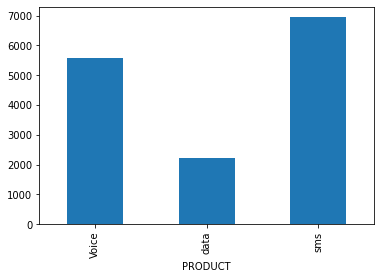

In [24]:
# Which products were the most used

t_df_combo.groupby('PRODUCT')['DW_B_NUMBER'].count().plot.bar()

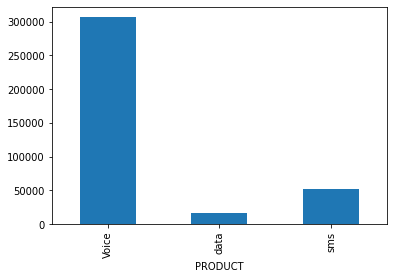

In [25]:
# Which products produces the highest income for MTN 

t_df_combo.groupby('PRODUCT')['VALUE'].sum().plot.bar()

In [26]:
group = data[data['STATUS'] == 'not in service']
group.groupby(['VILLES'])['SITE_ID'].count().sort_values(ascending = False)

# data[data['STATUS'] == 'not in service']

VILLES
YOPOUGON      132
ADJAME         75
DIVO           44
KORHOGO        41
ABOBO          35
MAN            26
PORT-BOUET     20
BONGOUANOU     13
ATTECOUBE      11
Name: SITE_ID, dtype: int64

In [55]:
# Cities with lowest number of cells_ID on site
print(data.groupby('VILLES')['DW_B_NUMBER'].count().nsmallest(5))

VILLES
ABONGOUA    1
AGONDA      1
AGOU        1
AHOUANOU    1
ALLOKOI     1
Name: DW_B_NUMBER, dtype: int64


In [71]:
# merge users_per_city and income_per_city to be able to plot how users and income correlate per city

users_income_merge = pd.merge(users_per_city,income_per_city,how = 'inner', on ='VILLES')

users_income_merge = users_income_merge.nlargest(20,'DW_A_NUMBER')

users_income_merge

,DW_A_NUMBER,VALUE
VILLES,,
YOPOUGON,1765,42597
ABOBO,1202,24565
COCODY,744,36751
ADJAME,564,13883
KOUMASSI,441,14597
MARCORY,430,11710
TREICHVILLE,398,13148
YAMOUSSOUKRO,362,7903
PORT-BOUET,313,7590


In [74]:
# Get the ratio of income to users and see how they correlate

users_income_merge['Ratio'] = users_income_merge['VALUE']/users_income_merge['DW_A_NUMBER']

print(users_income_merge.sort_values('Ratio', ascending = False))

              DW_A_NUMBER  VALUE      Ratio
VILLES                                     
COCODY                744  36751  49.396505
SAN-PEDRO             223   7468  33.488789
KOUMASSI              441  14597  33.099773
TREICHVILLE           398  13148  33.035176
GAGNOA                142   4611  32.471831
BOUAKE                263   7361  27.988593
MARCORY               430  11710  27.232558
MAN                   132   3253  24.643939
ADJAME                564  13883  24.615248
PORT-BOUET            313   7590  24.249201
YOPOUGON             1765  42597  24.134278
DIVO                  207   4905  23.695652
YAMOUSSOUKRO          362   7903  21.831492
DALOA                 306   6456  21.098039
DUEKOUE                76   1600  21.052632
ABOBO                1202  24565  20.436772
SOUBRE                 99   1562  15.777778
KORHOGO               148   2181  14.736486
ATTECOUBE             307   3775  12.296417
DABOU                  88    675   7.670455


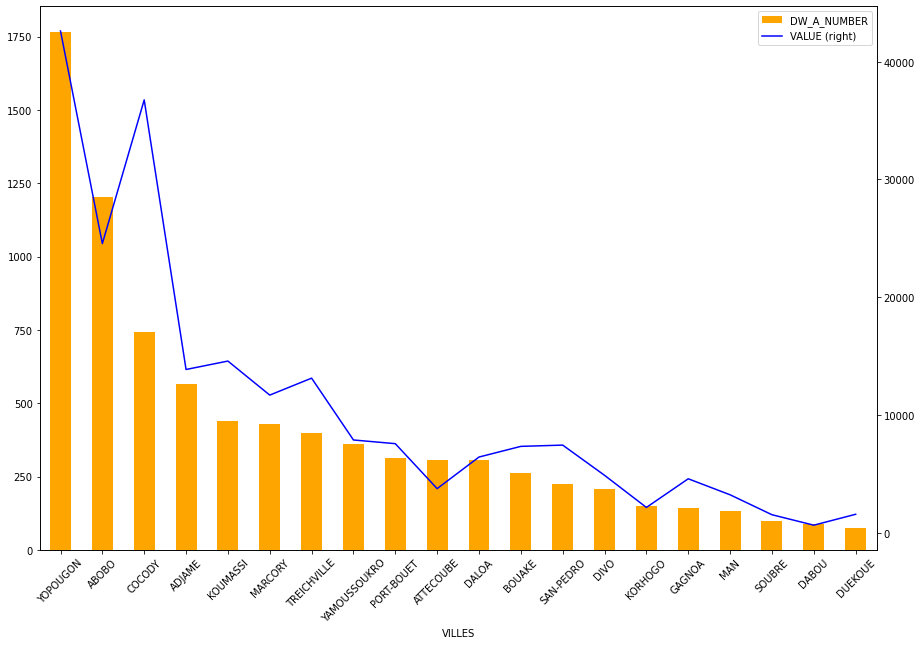

In [73]:
# Create the figure and axes object

import matplotlib.pyplot as plt

fig, ax= plt.subplots()
# Plot the first x and y axes:
users_income_merge.plot(
    use_index=True, 
    kind='bar',
    y='DW_A_NUMBER', 
    ax=ax, 
    color='orange',
    figsize=(15,10)
)
# Plot the second x and y axes. 
# By secondary_y = True a second y-axis is requested
users_income_merge.plot(
    use_index=True, 
    y='VALUE', 
    ax=ax, 
    secondary_y=True, 
    color='blue',
    figsize=(15,10)
)
ax.tick_params(axis='x', labelrotation = 45)
plt.show()

***DATA ANALYSIS OBSERVATIONS***

1. City with highest number of users **Yopougon**
2. City with the highest income **Yopougon**
3. Most used product **SMS**
4. Poduct with highest income **Voice**
5. City with highets income to use ratio **Cocody**
6. City which encountered the most not in service situations **Yopougon**
7. City with least number of cells on site **Abongoua**

# Recommendation

From our analysis we would recommend that MTN prioritize andupgrade the cities with the highest number of users. Such as the city **Yopougon** which has the largest number of users and largest income.

Another recommendation is to upgrade cities with a higher ratio of income to users as it shows that they have great growth potential.Such as the city of  **Cocody** with as high a ratio as 49%

The most used product is **sms**. They can increase and advertise to get more people to use sms

The product with the highest income is **voice**.They can prioritize it and get more users to use voice.


# Evaluation

The overall results of the MTN Cote D’Ivoire data analysis are fairly easy to communicate from a business perspective. The analysis produced what are hoped to be better strategy upgrade recommendations. 

**Ranking the Recommendations**. Because analysis within the sample provided was based on statistical criteria and ease of interpretation. Thus, the analysis gave different recommendations for different situations.

**New Questions**. How does the population of a city affect the number of users and income? This will let us know which cities are more likely to benefit from the upgrade
